## Step1. 사진 모으기


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(image_path)
img1_path = os.path.join(image_path, 'Image from iOS.jpg')
img2_path = os.path.join(image_path, 'Image from iOS1.jpg')

image1 = face_recognition.load_image_file(img1_path)
image2 = face_recognition.load_image_file(img2_path)

img1_face_locations = face_recognition.face_locations(image1)
img2_face_locations = face_recognition.face_locations(image2)

print("Image 1의 얼굴 영역 좌표 : ", img1_face_locations)
print("Image 2의 얼굴 영역 좌표 : ", img2_face_locations)

Image 1의 얼굴 영역 좌표 :  [(461, 889, 846, 504)]
Image 2의 얼굴 영역 좌표 :  [(110, 849, 665, 295)]


## Step2. 얼굴 영역 자르기


In [2]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

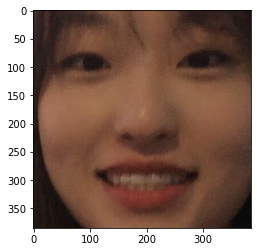

In [3]:
cropped_face1 = get_cropped_face(img1_path)
plt.imshow(cropped_face1)


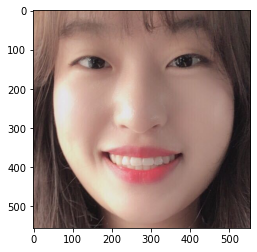

In [4]:
cropped_face2 = get_cropped_face(img2_path)
plt.imshow(cropped_face2)


## Step3. 얼굴 영역의 임베딩 추출하기


def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [5]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [6]:
embedding1 = get_face_embedding(cropped_face1)
embedding2 = get_face_embedding(cropped_face2)

In [7]:
distances = np.linalg.norm(embedding1[0] - embedding2[0])
print(distances)

0.2970088115943778


In [8]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    for file in file_list:
        image_path = os.path.join(dir_path, file)
        try:
            face = get_cropped_face(image_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        except:
            pass
    return embedding_dict

In [9]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
embedding_dict = get_face_embedding_dict(dir_path)

In [10]:
embedding_dict['아이린']

array([-0.10181993,  0.07929453,  0.00718652, -0.11879449, -0.08134992,
       -0.04299925, -0.05773568, -0.11321756,  0.15138903, -0.20885536,
        0.18029809, -0.13891748, -0.22281893, -0.00120886, -0.0830161 ,
        0.24276291, -0.13112399, -0.12633233, -0.07051142,  0.01983993,
        0.11000504,  0.06254245, -0.06499258,  0.10676219, -0.01683923,
       -0.28969833, -0.14053418, -0.01125034, -0.01945219, -0.07790258,
       -0.08217339,  0.03632967, -0.15188614, -0.04739356,  0.02344309,
        0.15661392, -0.01905784, -0.11563408,  0.12024595,  0.02981463,
       -0.2856054 ,  0.10640097,  0.11470314,  0.26011196,  0.15611403,
       -0.00350354, -0.01439178, -0.19605443,  0.11402895, -0.17554669,
        0.02433313,  0.09433556,  0.08332569,  0.07521395,  0.04545403,
       -0.11212274,  0.06941453,  0.09918618, -0.15369159,  0.00786762,
        0.15859936, -0.08083047, -0.03088863, -0.12292906,  0.17480746,
        0.10221735, -0.10163692, -0.25470114,  0.14337   , -0.20

## Step4. 모은 연예인들과 비교하기


In [11]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1] - embedding_dict[name2], ord=2)

In [12]:

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [13]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [14]:
embedding_dict['Image from iOS'] = embedding2[0]

In [15]:
get_nearest_face('Image from iOS',10)

순위 1 : 이름(Image from iOS), 거리(0.0)
순위 2 : 이름(승희), 거리(0.36399331933380835)
순위 3 : 이름(한선화), 거리(0.3659866298960534)
순위 4 : 이름(우기), 거리(0.3709843140706374)
순위 5 : 이름(사쿠라), 거리(0.3856281232010112)
순위 6 : 이름(아이즈원조유리), 거리(0.39554154810325665)
순위 7 : 이름(김고은), 거리(0.39898426206829374)
순위 8 : 이름(케이), 거리(0.4103655247791089)
순위 9 : 이름(레드벨벳웬디), 거리(0.4132364377597985)
순위 10 : 이름(온앤오프라운), 거리(0.418880190482221)


## Step5. 다양한 재미있는 시각화 시도해 보기


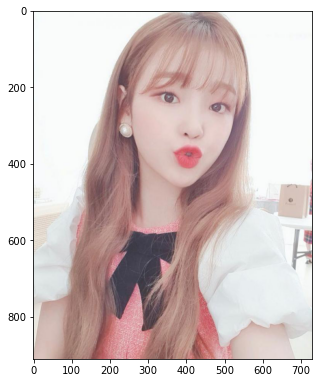

In [16]:
import matplotlib.image as img

plt.figure(figsize=(5, 10))
file_path = dir_path + r'/승희.jpeg'
ndarray = img.imread(file_path)
plt.imshow(ndarray)

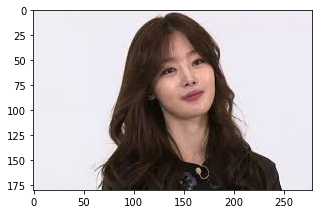

In [20]:
plt.figure(figsize=(5, 10))
file_path = dir_path + r'/한선화.jpeg'
ndarray = img.imread(file_path)
plt.imshow(ndarray)

## Report

다른 닮은 꼴 어플에서 나오던 사람들이 나와서 '정상작동 하는구나' 생각했다.

내가 잘 나왔다고 생각하는 사진을 넣었으니까 내가 원하는 이미지가 이런 이미지였구나 하고 생각하는 계기가 되었다.

샘플 사진을 구하는 과정에서 좀 힘들었지만 여러 사람의 도움으로 쉽게 완성할 수 있었다.